# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [ ]:
! pip install Pillow

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 8.18 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [ ]:
!ls MNIST

processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [ ]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

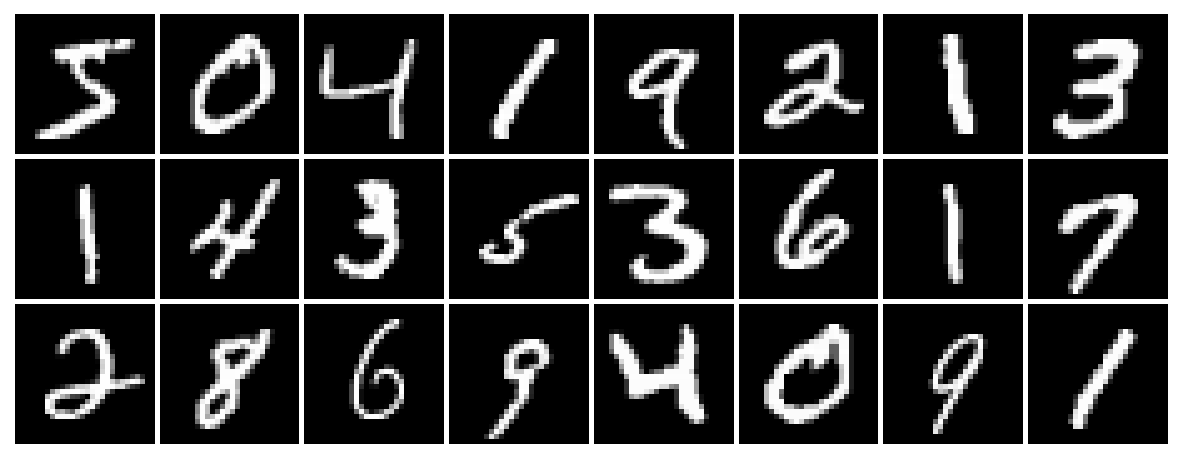

In [ ]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


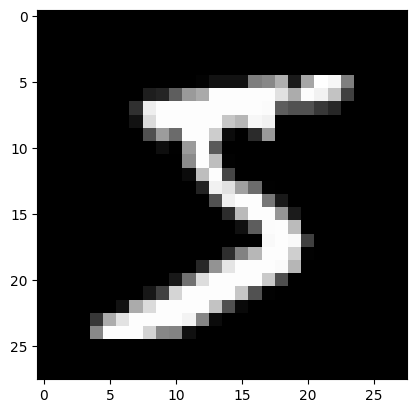

In [ ]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [ ]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0252,  0.1441,  0.0322,  0.4557, -0.3479, -0.2175,  0.2035,  0.0423,
          0.0777,  0.0487],
        [-0.2340,  0.0863, -0.1908,  0.1904, -0.4225, -0.0847,  0.1832, -0.0450,
         -0.0074,  0.0525],
        [-0.1313, -0.2207, -0.2118,  0.1035, -0.2815, -0.1879, -0.0770, -0.2626,
          0.2119,  0.2091],
        [-0.1543,  0.1640, -0.1422,  0.3013, -0.0950, -0.0390,  0.0366, -0.2275,
          0.0686, -0.0509],
        [-0.0895,  0.0584, -0.0943,  0.3544, -0.2036, -0.2304, -0.1388, -0.0925,
         -0.0536,  0.0797]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-cbhjd3u2
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-cbhjd3u2
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=90d8019b1f21dcbb584258cdae33d583d232f3097b8f4dd671465d2816045fb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-az1botds/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3330, grad_fn=<NllLossBackward0>)

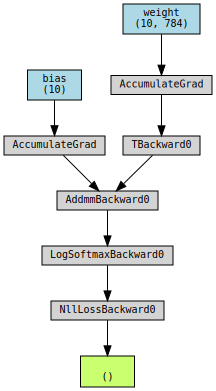

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Print per-epoch loss and accuracy as requested by Exercise 1
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'.format(i+1, epochs, loss.item(), accuracy))

Epoch[1/100], loss: 2.332977, acc: 0.126000
Epoch[2/100], loss: 1.823105, acc: 0.556000
Epoch[3/100], loss: 1.484392, acc: 0.736000
Epoch[4/100], loss: 1.260325, acc: 0.780000
Epoch[5/100], loss: 1.106851, acc: 0.799000
Epoch[6/100], loss: 0.994422, acc: 0.812000
Epoch[7/100], loss: 0.911193, acc: 0.829000
Epoch[8/100], loss: 0.847358, acc: 0.839000
Epoch[9/100], loss: 0.796656, acc: 0.842000
Epoch[10/100], loss: 0.755073, acc: 0.848000
Epoch[11/100], loss: 0.720128, acc: 0.855000
Epoch[12/100], loss: 0.690217, acc: 0.856000
Epoch[13/100], loss: 0.664236, acc: 0.860000
Epoch[14/100], loss: 0.641388, acc: 0.865000
Epoch[15/100], loss: 0.621087, acc: 0.868000
Epoch[16/100], loss: 0.602884, acc: 0.869000
Epoch[17/100], loss: 0.586436, acc: 0.873000
Epoch[18/100], loss: 0.571470, acc: 0.878000
Epoch[19/100], loss: 0.557770, acc: 0.879000
Epoch[20/100], loss: 0.545162, acc: 0.882000
Epoch[21/100], loss: 0.533503, acc: 0.885000
Epoch[22/100], loss: 0.522675, acc: 0.886000
Epoch[23/100], loss

In [ ]:
print('Final loss:', loss.item())

Final loss: 0.26500651240348816


### Visualizando gráfico de perda durante o treinamento

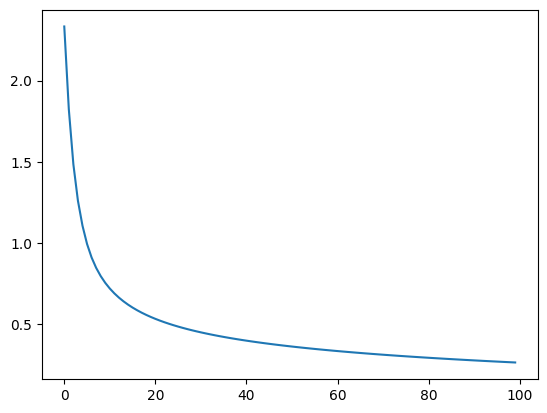

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.939


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,2,1,0
2,0,1,90,2,0,1,1,1,2,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,4
8,0,2,2,0,0,1,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


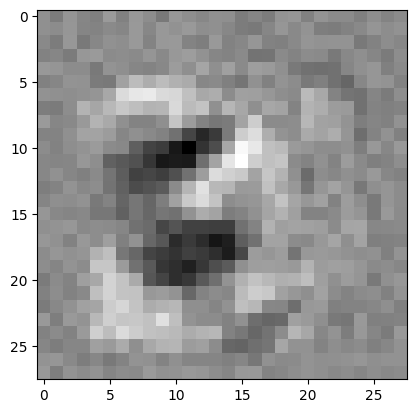

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

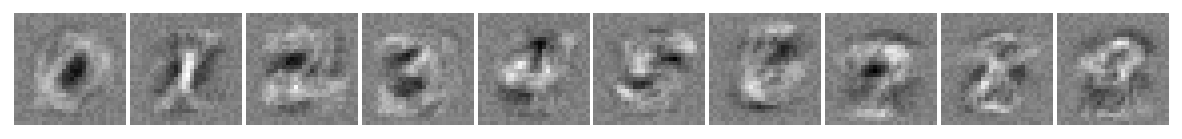

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [ ]:
# ===== EXERCÍCIO 1 =====
# Imprime época, perda e acurácia ao final de cada época

losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))

    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # cálculo da acurácia
    _, predicts = torch.max(outputs, 1)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # ===== PRINT POR ÉPOCA =====
    print(f"Epoch [{i+1}/{epochs}]  |  Loss: {loss.item():.6f}  |  Acc: {accuracy:.6f}")


Epoch [1/100]  |  Loss: 0.133751  |  Acc: 0.977000
Epoch [2/100]  |  Loss: 0.133413  |  Acc: 0.977000
Epoch [3/100]  |  Loss: 0.133077  |  Acc: 0.977000
Epoch [4/100]  |  Loss: 0.132742  |  Acc: 0.977000
Epoch [5/100]  |  Loss: 0.132409  |  Acc: 0.978000
Epoch [6/100]  |  Loss: 0.132077  |  Acc: 0.978000
Epoch [7/100]  |  Loss: 0.131746  |  Acc: 0.978000
Epoch [8/100]  |  Loss: 0.131418  |  Acc: 0.978000
Epoch [9/100]  |  Loss: 0.131090  |  Acc: 0.978000
Epoch [10/100]  |  Loss: 0.130764  |  Acc: 0.978000
Epoch [11/100]  |  Loss: 0.130440  |  Acc: 0.978000
Epoch [12/100]  |  Loss: 0.130117  |  Acc: 0.978000
Epoch [13/100]  |  Loss: 0.129795  |  Acc: 0.978000
Epoch [14/100]  |  Loss: 0.129475  |  Acc: 0.978000
Epoch [15/100]  |  Loss: 0.129157  |  Acc: 0.978000
Epoch [16/100]  |  Loss: 0.128839  |  Acc: 0.978000
Epoch [17/100]  |  Loss: 0.128523  |  Acc: 0.979000
Epoch [18/100]  |  Loss: 0.128209  |  Acc: 0.979000
Epoch [19/100]  |  Loss: 0.127896  |  Acc: 0.979000
Epoch [20/100]  |  Lo

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

In [ ]:
# ===== EXERCÍCIO 2 =====
# Visualização dos gradientes da classe 4 ao final de cada época

for i in range(epochs):
    inputs = Variable(x_train.view(-1, 28*28))
    outputs = model(inputs)

    loss = criterion(outputs, Variable(y_train))

    optimizer.zero_grad()
    loss.backward()

    # ===== GRADIENTES DA CLASSE 4 =====
    print(f"\nEpoch [{i+1}/{epochs}] \u2014 Gradientes da classe 4:")

    # pesos da camada (weight tem shape [10, 784])
    print(model.weight.grad[4])

    # bias da classe 4
    print("Bias grad:", model.bias.grad[4])

    optimizer.step()

Streaming output truncated to the last 5000 lines.
         6.0996e-06,  9.2934e-06,  3.8602e-05,  7.6178e-05,  1.0859e-04,
         1.9407e-04,  7.6385e-05,  2.2048e-04,  1.3381e-04,  5.2116e-06,
         4.1501e-04, -3.5778e-05, -4.3639e-04,  3.0069e-04, -2.3687e-04,
         7.1363e-05, -3.1098e-04,  3.6935e-05, -4.0201e-07, -2.0921e-04,
        -2.8058e-05,  2.2031e-06,  5.0471e-08,  1.0105e-08,  3.1797e-08,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  4.3791e-09,  2.3846e-06,
         1.6122e-05,  4.9595e-05,  1.1018e-04, -4.8581e-06,  2.6087e-05,
         1.5027e-04, -3.8727e-05,  9.8358e-07,  5.8639e-04, -1.3578e-04,
         7.0694e-05,  2.3900e-04, -2.2912e-04,  7.7698e-06, -4.3054e-04,
        -2.8923e-05, -4.4755e-05, -1.2476e-04, -4.0335e-05,  1.4399e-06,
         1.9879e-07,  5.6866e-09,  1.3024e-08,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  7.3785e-11,  7.1679e-06,  1.5860e-05,  3.9535e-05,
         4.6408e-05, -5.0843e-05, -4.0346e-05, -1.2497e-04, -1.5320e-04,


<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

## 1. Qual é o shape da matriz de entrada na rede?


A entrada é uma imagem 28×28 que vocês achatam (reshape) para um vetor 1D:

Para um único exemplo:
[1, 784]

Para um batch completo (como todo o treino):
Se forem, por exemplo, 28 000 imagens:
[28000, 784]

## 2. Qual é o shape da saída da rede?


A camada Linear é:
```
nn.Linear(784, 10)
```

Portanto, a saída tem:

Para um exemplo:
[1, 10]

Para todos os exemplos de treino (28 000):
[28000, 10]

## 3. Qual é o número total de parâmetros da rede, incluindo o bias?

A camada Linear tem:

- 784 entradas

- 10 saídas

Parâmetros dos pesos:

- 10 neurônios x 784 pesos cada =
7840 pesos



Há 1 bias por saída (classe):

- 10 bias

Total de parâmetros:

- 7840 + 10 = 7850 parâmetros